In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping

def preprocess_data(data):
    # Unpack data
    X_train_valid = data['X_train_valid']
    y_train_valid = data['y_train_valid']
    X_test = data['X_test']
    y_test = data['y_test']

    # One-hot Encoding for y data
    encoder = LabelBinarizer()
    y_train_valid = encoder.fit_transform(y_train_valid)
    y_test = encoder.fit_transform(y_test)

    # Splitting training and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

    total_y_train = y_train
    total_y_val = y_val
    total_y_test = y_test

    # Trim
    X_train = X_train[:,:,0:800]
    X_val = X_val[:,:,0:800]
    X_test = X_test[:,:,0:800]

    # Maxpooling
    total_X_train = np.max(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    total_X_val = np.max(X_val.reshape(X_val.shape[0], X_val.shape[1], -1, 4), axis=3)
    total_X_test = np.max(X_test.reshape(X_test.shape[0], X_test.shape[1], -1, 4), axis=3)

    # Validation and Test Data augmentation stops here (reshaping purposes)
    # Averaging and Subsampling below only apply to Training Data

    # Average every 4 timesteps
    X_train_average = np.mean(X_train.reshape(X_train.shape[0], X_train.shape[1], -1, 4), axis=3)
    X_train_average += np.random.normal(0.0, 0.5, X_train_average.shape)
    total_X_train = np.vstack((total_X_train, X_train_average))
    total_y_train = np.vstack((total_y_train, y_train))

    # Subsample every 4 time-dumps
    for i in range(0, 4):
        X_train_subsample = X_train[:, :, i::4] + np.random.normal(0.0, 0.5, X_train[:, :,i::4].shape)
        total_X_train = np.vstack((total_X_train, X_train_subsample))
        total_y_train = np.vstack((total_y_train, y_train))

    return {'total_X_train': total_X_train, 'total_X_test': total_X_test,
            'total_X_val': total_X_val, 'total_y_val': total_y_val,
            'total_y_train': total_y_train, 'total_y_test': total_y_test}

(2115, 22, 1000)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 100, 22)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 300ms/step - loss: 6.1754 - accuracy: 0.2601 - val_loss: 4.2938 - val_accuracy: 0.2708
Epoch 2/75
2/2 [==============================] - 0s 128ms/step - loss: 5.9417 - accuracy: 0.2672 - val_loss: 4.4214 - val_accuracy: 0.3125
Epoch 3/75
2/2 [==============================] - 0s 209ms/step - loss: 5.7085 - accuracy: 0.2954 - val_loss: 4.5591 - val_accuracy: 0.2500
Epoch 4/75
2/2 [==============================] - 0s 173ms/step - loss: 5.6739 - accuracy: 0.3007 - val_loss: 4.6499 - val_accuracy: 0.2500
Epoch 5/75
2/2 [==============================] - 0s 145ms/step - loss: 5.4068 - accuracy: 0.3025 - val_loss: 4.4973 - val_accuracy: 0.3333
Epoch 6/75
2/2 [==============================] - 0s 133ms/step - loss: 5.3388 - accuracy: 0.3228 - val_loss: 4.5312 - val_accuracy: 0.2708
Epoch 7/75
2/2 [==============================] - 0s 150ms/step - loss: 5.2279 - accuracy: 0.3007 - val_loss: 4.6015 - val_accuracy: 0.2500
Epoch 8/75
2/2 [===============

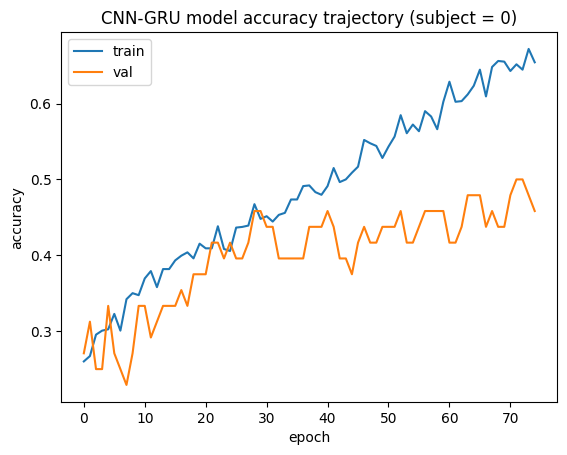

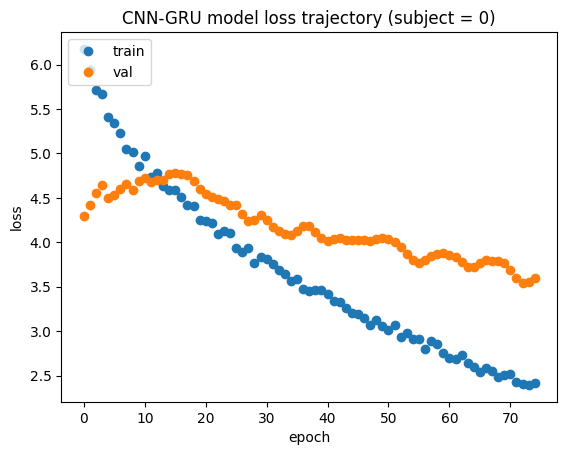

Test accuracy of the CNN-GRU model: 0.4399999976158142
(2115, 22, 1000)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 144ms/step - loss: 5.7796 - accuracy: 0.2660 - val_loss: 3.9791 - val_accuracy: 0.3428
Epoch 2/75
16/16 [==============================] - 2s 143ms/step - loss: 5.1586 - accuracy: 0.2895 - val_loss: 3.8560 - val_accuracy: 0.3333
Epoch 3/75
16/16 [==============================] - 2s 137ms/step - loss: 4.6340 - accuracy: 0.3057 - val_loss: 3.6098 - val_accuracy: 0.3688
Epoch 4/75
16/16 [==============================] - 2s 143ms/step - loss: 4.3059 - accuracy: 0.3064 - val_loss: 3.4463 - val_accuracy: 0.3664
Epoch 5/75
16/16 [==============================] - 2s 140ms/step - loss: 4.0181 - accuracy: 0.3073 - val_loss: 3.2862 - val_accuracy: 0.4137
Epoch 6/75
16/16 [==============================] - 2s 147ms/step - loss: 3.7707 - accuracy: 0.3179 - val_loss: 3.1692 - val_accuracy: 0.3877
Epoch 7/75
16/16 [==============================] - 2s 153ms/step - loss: 3.5508 - accuracy: 0.3274 - val_loss: 3.0550 - val_accuracy: 0.4137
Epoch 8/75
16/16 

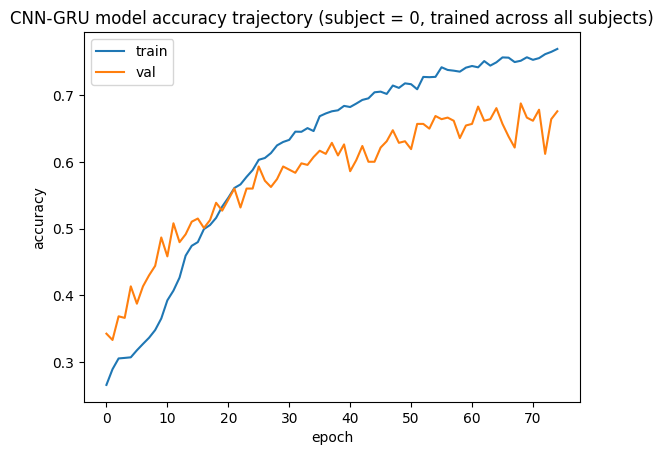

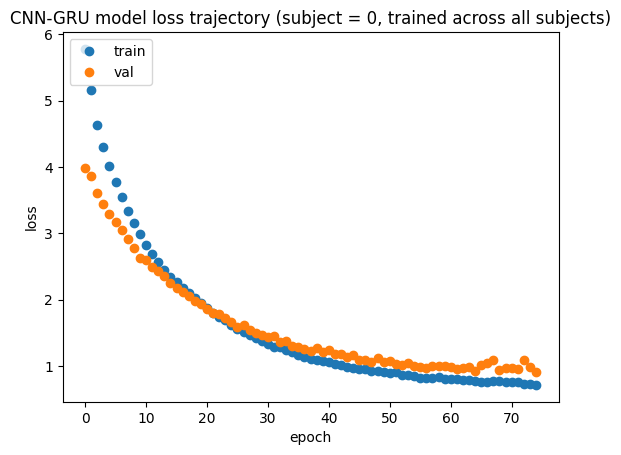

Test accuracy of the CNN-GRU model: 0.6000000238418579
(2115, 22, 1000)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 200, 22)           4862      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 100, 22)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 100, 22)           4862      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 50, 22)            0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 2s 325ms/step - loss: 5.8945 - accuracy: 0.2473 - val_loss: 4.0037 - val_accuracy: 0.1875
Epoch 2/75
2/2 [==============================] - 0s 128ms/step - loss: 5.7689 - accuracy: 0.2589 - val_loss: 4.0314 - val_accuracy: 0.2917
Epoch 3/75
2/2 [==============================] - 0s 114ms/step - loss: 5.3989 - accuracy: 0.2917 - val_loss: 4.1211 - val_accuracy: 0.2500
Epoch 4/75
2/2 [==============================] - 0s 143ms/step - loss: 5.4022 - accuracy: 0.2713 - val_loss: 3.9646 - val_accuracy: 0.2500
Epoch 5/75
2/2 [==============================] - 0s 122ms/step - loss: 5.2923 - accuracy: 0.2890 - val_loss: 3.9723 - val_accuracy: 0.1667
Epoch 6/75
2/2 [==============================] - 0s 139ms/step - loss: 4.9195 - accuracy: 0.3307 - val_loss: 4.0399 - val_accuracy: 0.1667
Epoch 7/75
2/2 [==============================] - 0s 131ms/step - loss: 4.9610 - accuracy: 0.2899 - val_loss: 4.1551 - val_accuracy: 0.2292
Epoch 8/75
2/2 [===============

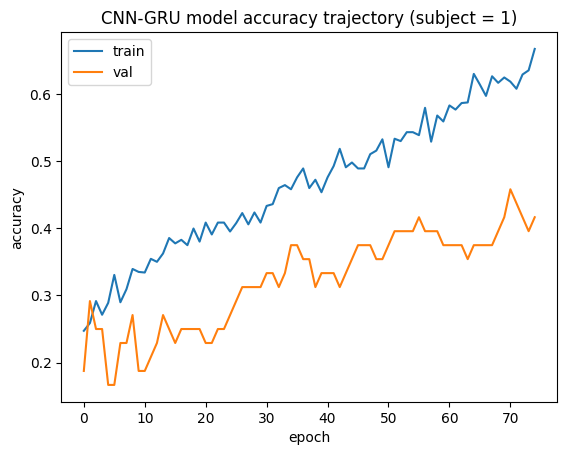

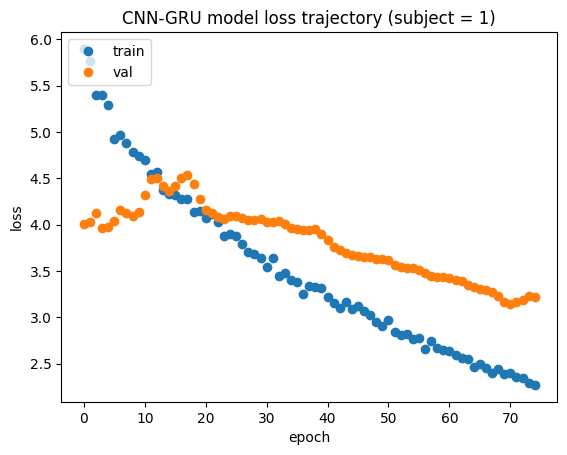

Test accuracy of the CNN-GRU model: 0.3199999928474426
(2115, 22, 1000)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 157ms/step - loss: 5.9017 - accuracy: 0.2625 - val_loss: 4.2321 - val_accuracy: 0.3191
Epoch 2/75
16/16 [==============================] - 2s 147ms/step - loss: 5.1720 - accuracy: 0.2885 - val_loss: 3.8501 - val_accuracy: 0.3215
Epoch 3/75
16/16 [==============================] - 2s 147ms/step - loss: 4.6999 - accuracy: 0.2976 - val_loss: 3.5864 - val_accuracy: 0.3546
Epoch 4/75
16/16 [==============================] - 2s 143ms/step - loss: 4.3095 - accuracy: 0.3019 - val_loss: 3.5113 - val_accuracy: 0.3428
Epoch 5/75
16/16 [==============================] - 2s 143ms/step - loss: 4.0178 - accuracy: 0.3120 - val_loss: 3.3630 - val_accuracy: 0.3688
Epoch 6/75
16/16 [==============================] - 2s 150ms/step - loss: 3.7740 - accuracy: 0.3137 - val_loss: 3.1489 - val_accuracy: 0.3972
Epoch 7/75
16/16 [==============================] - 2s 153ms/step - loss: 3.5160 - accuracy: 0.3269 - val_loss: 3.0576 - val_accuracy: 0.3901
Epoch 8/75
16/16 

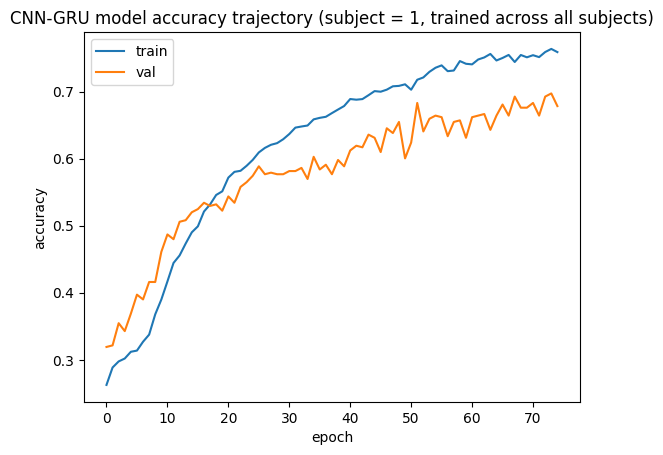

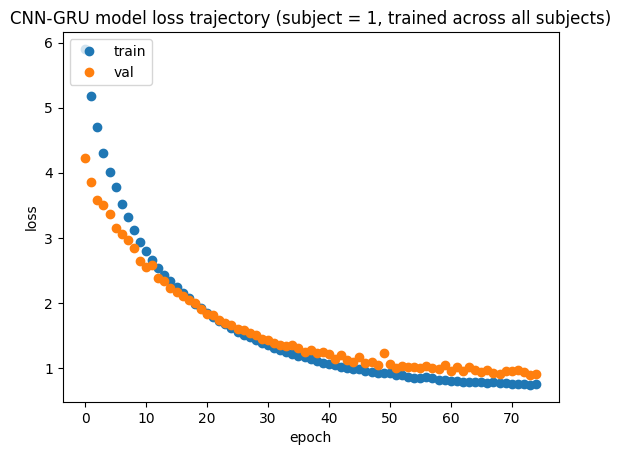

Test accuracy of the CNN-GRU model: 0.5799999833106995
(2115, 22, 1000)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 2s 389ms/step - loss: 6.1192 - accuracy: 0.2651 - val_loss: 5.1303 - val_accuracy: 0.2083
Epoch 2/75
2/2 [==============================] - 0s 201ms/step - loss: 6.0619 - accuracy: 0.2722 - val_loss: 4.0496 - val_accuracy: 0.3542
Epoch 3/75
2/2 [==============================] - 0s 182ms/step - loss: 5.8659 - accuracy: 0.2633 - val_loss: 3.8737 - val_accuracy: 0.3958
Epoch 4/75
2/2 [==============================] - 0s 159ms/step - loss: 5.7058 - accuracy: 0.2651 - val_loss: 4.2118 - val_accuracy: 0.2292
Epoch 5/75
2/2 [==============================] - 0s 154ms/step - loss: 5.6343 - accuracy: 0.2828 - val_loss: 4.1793 - val_accuracy: 0.3125
Epoch 6/75
2/2 [==============================] - 0s 174ms/step - loss: 5.7004 - accuracy: 0.2642 - val_loss: 4.0694 - val_accuracy: 0.2708
Epoch 7/75
2/2 [==============================] - 0s 193ms/step - loss: 5.5302 - accuracy: 0.2855 - val_loss: 3.8896 - val_accuracy: 0.3333
Epoch 8/75
2/2 [===============

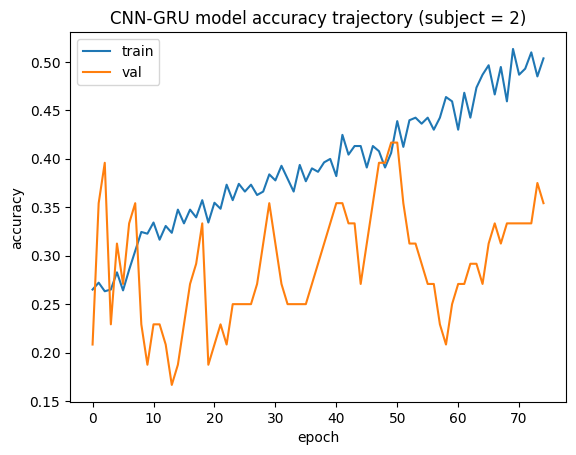

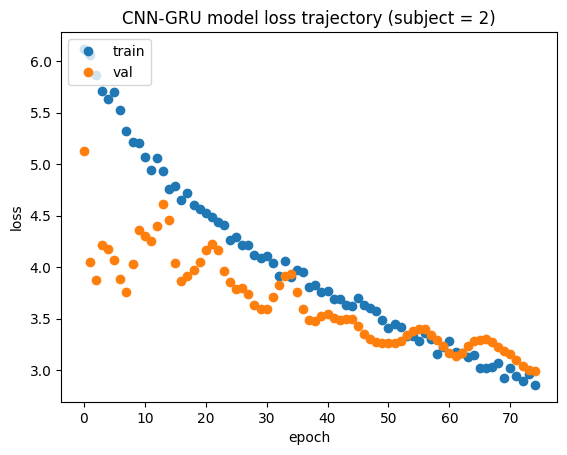

Test accuracy of the CNN-GRU model: 0.3400000035762787
(2115, 22, 1000)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 4s 194ms/step - loss: 5.6574 - accuracy: 0.2732 - val_loss: 4.2775 - val_accuracy: 0.3026
Epoch 2/75
16/16 [==============================] - 3s 159ms/step - loss: 5.0022 - accuracy: 0.2935 - val_loss: 3.7063 - val_accuracy: 0.3381
Epoch 3/75
16/16 [==============================] - 3s 177ms/step - loss: 4.5738 - accuracy: 0.2960 - val_loss: 3.6787 - val_accuracy: 0.3121
Epoch 4/75
16/16 [==============================] - 3s 164ms/step - loss: 4.2440 - accuracy: 0.2990 - val_loss: 3.4458 - val_accuracy: 0.3617
Epoch 5/75
16/16 [==============================] - 3s 168ms/step - loss: 3.9188 - accuracy: 0.3118 - val_loss: 3.3198 - val_accuracy: 0.3901
Epoch 6/75
16/16 [==============================] - 3s 177ms/step - loss: 3.7068 - accuracy: 0.3122 - val_loss: 3.0948 - val_accuracy: 0.3995
Epoch 7/75
16/16 [==============================] - 3s 178ms/step - loss: 3.4608 - accuracy: 0.3292 - val_loss: 2.9297 - val_accuracy: 0.4232
Epoch 8/75
16/16 

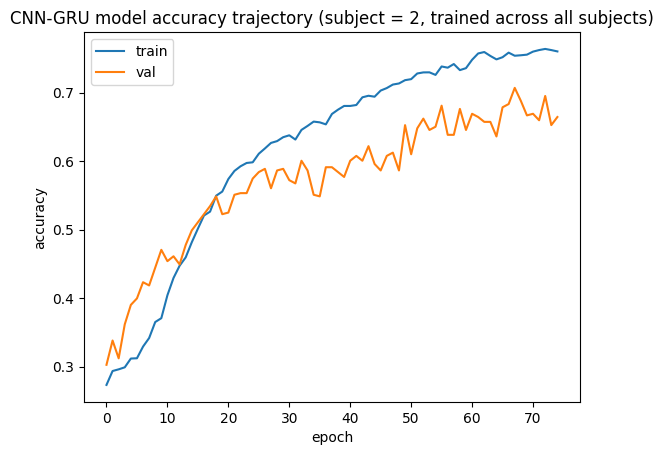

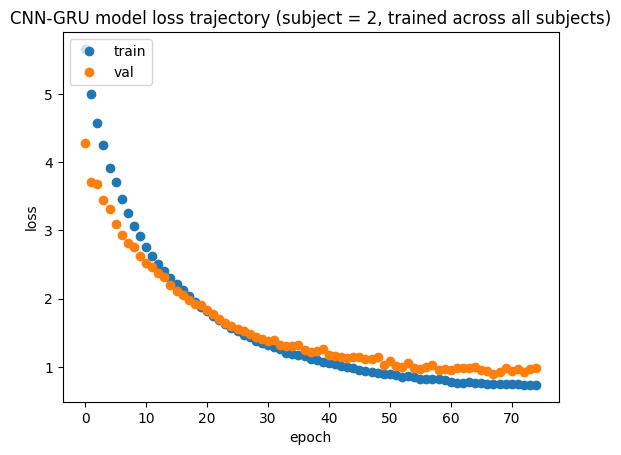

Test accuracy of the CNN-GRU model: 0.6000000238418579
(2115, 22, 1000)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_17 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 2s 393ms/step - loss: 6.0741 - accuracy: 0.2602 - val_loss: 4.2219 - val_accuracy: 0.3191
Epoch 2/75
2/2 [==============================] - 0s 154ms/step - loss: 5.9320 - accuracy: 0.2549 - val_loss: 4.6077 - val_accuracy: 0.1915
Epoch 3/75
2/2 [==============================] - 0s 162ms/step - loss: 5.6667 - accuracy: 0.2656 - val_loss: 4.7241 - val_accuracy: 0.1489
Epoch 4/75
2/2 [==============================] - 0s 156ms/step - loss: 5.6244 - accuracy: 0.3004 - val_loss: 4.5017 - val_accuracy: 0.1915
Epoch 5/75
2/2 [==============================] - 0s 307ms/step - loss: 5.3635 - accuracy: 0.2932 - val_loss: 4.7730 - val_accuracy: 0.2128
Epoch 6/75
2/2 [==============================] - 0s 206ms/step - loss: 5.2355 - accuracy: 0.3155 - val_loss: 5.0597 - val_accuracy: 0.1702
Epoch 7/75
2/2 [==============================] - 0s 169ms/step - loss: 5.1165 - accuracy: 0.3440 - val_loss: 5.0828 - val_accuracy: 0.1915
Epoch 8/75
2/2 [===============

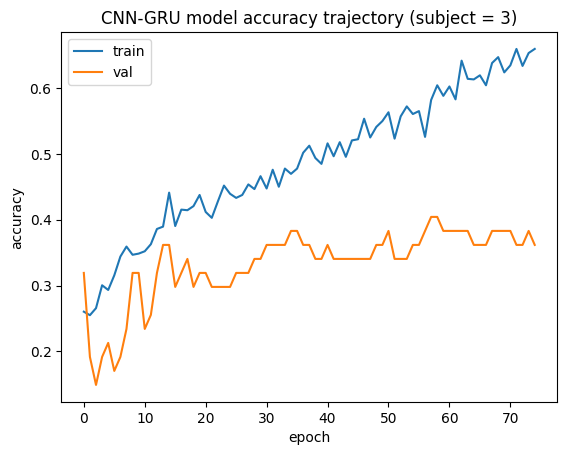

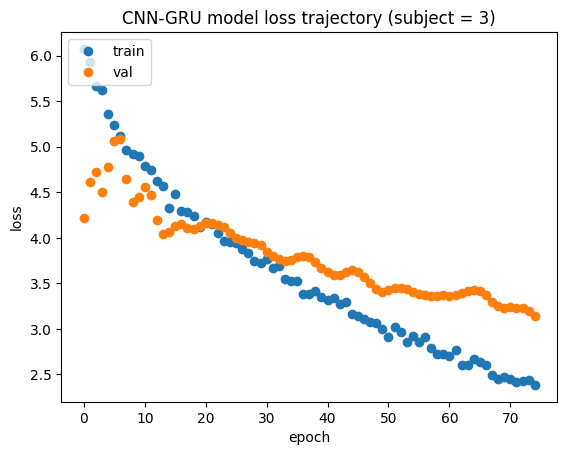

Test accuracy of the CNN-GRU model: 0.3799999952316284
(2115, 22, 1000)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_36 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 50, 22)           

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 4s 206ms/step - loss: 5.5148 - accuracy: 0.2623 - val_loss: 4.1446 - val_accuracy: 0.2861
Epoch 2/75
16/16 [==============================] - 3s 183ms/step - loss: 4.8572 - accuracy: 0.2840 - val_loss: 3.7320 - val_accuracy: 0.3144
Epoch 3/75
16/16 [==============================] - 3s 188ms/step - loss: 4.4301 - accuracy: 0.2940 - val_loss: 3.5226 - val_accuracy: 0.3664
Epoch 4/75
16/16 [==============================] - 3s 179ms/step - loss: 4.0891 - accuracy: 0.3053 - val_loss: 3.3790 - val_accuracy: 0.3617
Epoch 5/75
16/16 [==============================] - 3s 194ms/step - loss: 3.8226 - accuracy: 0.3027 - val_loss: 3.3048 - val_accuracy: 0.3262
Epoch 6/75
16/16 [==============================] - 3s 179ms/step - loss: 3.5895 - accuracy: 0.3135 - val_loss: 3.0793 - val_accuracy: 0.3664
Epoch 7/75
16/16 [==============================] - 3s 197ms/step - loss: 3.3686 - accuracy: 0.3237 - val_loss: 2.9442 - val_accuracy: 0.4066
Epoch 8/75
16/16 

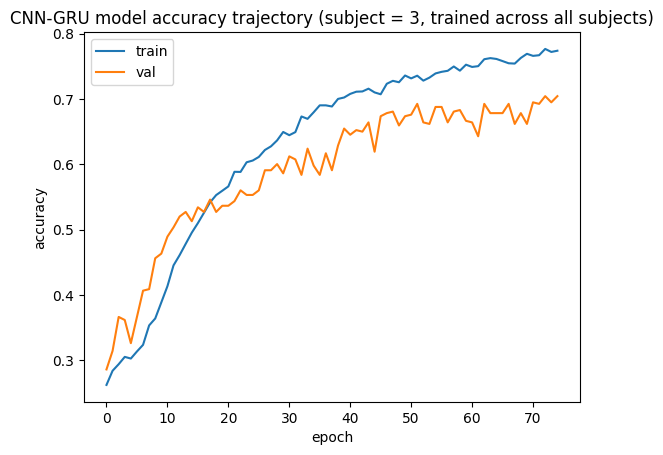

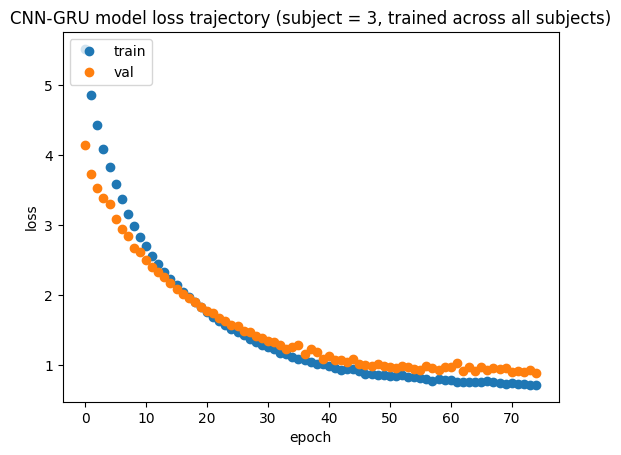

Test accuracy of the CNN-GRU model: 0.6000000238418579
(2115, 22, 1000)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_21 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 310ms/step - loss: 6.0597 - accuracy: 0.2491 - val_loss: 4.2417 - val_accuracy: 0.2979
Epoch 2/75
2/2 [==============================] - 0s 137ms/step - loss: 5.8566 - accuracy: 0.2660 - val_loss: 4.3897 - val_accuracy: 0.2553
Epoch 3/75
2/2 [==============================] - 0s 137ms/step - loss: 5.6125 - accuracy: 0.2677 - val_loss: 4.0407 - val_accuracy: 0.4255
Epoch 4/75
2/2 [==============================] - 0s 152ms/step - loss: 5.1736 - accuracy: 0.3289 - val_loss: 4.4423 - val_accuracy: 0.2979
Epoch 5/75
2/2 [==============================] - 0s 137ms/step - loss: 5.3320 - accuracy: 0.3156 - val_loss: 4.2792 - val_accuracy: 0.3191
Epoch 6/75
2/2 [==============================] - 0s 144ms/step - loss: 5.0958 - accuracy: 0.3218 - val_loss: 4.2364 - val_accuracy: 0.2766
Epoch 7/75
2/2 [==============================] - 0s 135ms/step - loss: 5.0817 - accuracy: 0.3209 - val_loss: 4.1740 - val_accuracy: 0.3191
Epoch 8/75
2/2 [===============

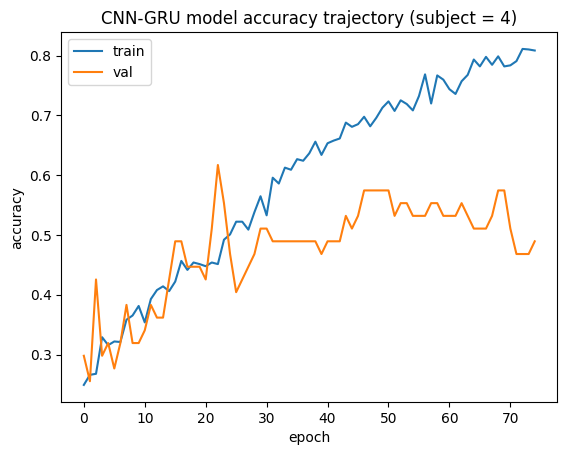

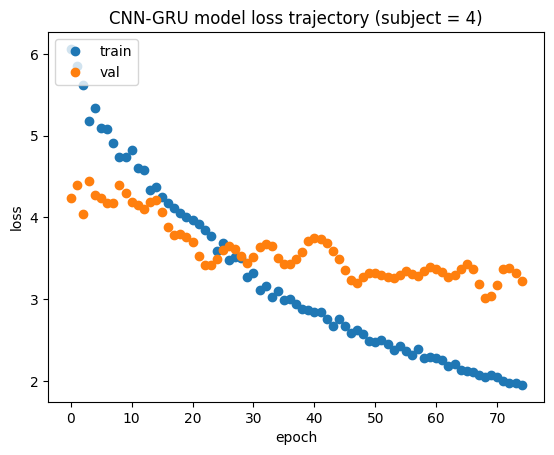

Test accuracy of the CNN-GRU model: 0.6170212626457214
(2115, 22, 1000)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_44 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_23 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_45 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 5s 236ms/step - loss: 5.8751 - accuracy: 0.2628 - val_loss: 4.1311 - val_accuracy: 0.3144
Epoch 2/75
16/16 [==============================] - 3s 192ms/step - loss: 5.2243 - accuracy: 0.2800 - val_loss: 3.8578 - val_accuracy: 0.3121
Epoch 3/75
16/16 [==============================] - 3s 200ms/step - loss: 4.7552 - accuracy: 0.2959 - val_loss: 3.7740 - val_accuracy: 0.3286
Epoch 4/75
16/16 [==============================] - 3s 190ms/step - loss: 4.3970 - accuracy: 0.3107 - val_loss: 3.5753 - val_accuracy: 0.3522
Epoch 5/75
16/16 [==============================] - 3s 178ms/step - loss: 4.1303 - accuracy: 0.3018 - val_loss: 3.4088 - val_accuracy: 0.3712
Epoch 6/75
16/16 [==============================] - 3s 205ms/step - loss: 3.8540 - accuracy: 0.3154 - val_loss: 3.3140 - val_accuracy: 0.3712
Epoch 7/75
16/16 [==============================] - 4s 222ms/step - loss: 3.6246 - accuracy: 0.3194 - val_loss: 3.1318 - val_accuracy: 0.3783
Epoch 8/75
16/16 

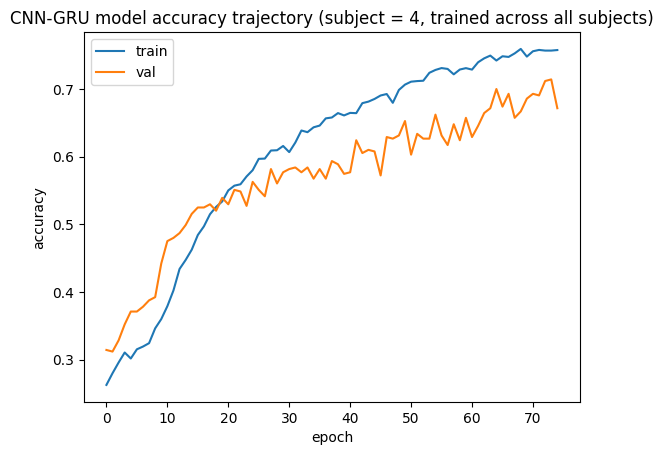

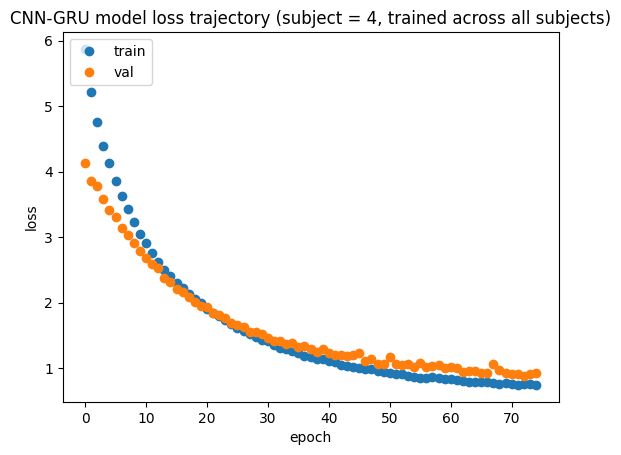

Test accuracy of the CNN-GRU model: 0.7021276354789734
(2115, 22, 1000)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_25 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 2s 338ms/step - loss: 6.1921 - accuracy: 0.2642 - val_loss: 4.6003 - val_accuracy: 0.2083
Epoch 2/75
2/2 [==============================] - 0s 177ms/step - loss: 5.8496 - accuracy: 0.2784 - val_loss: 4.7534 - val_accuracy: 0.2917
Epoch 3/75
2/2 [==============================] - 0s 134ms/step - loss: 5.6225 - accuracy: 0.2970 - val_loss: 4.5251 - val_accuracy: 0.3542
Epoch 4/75
2/2 [==============================] - 0s 243ms/step - loss: 5.6981 - accuracy: 0.2757 - val_loss: 4.3611 - val_accuracy: 0.3958
Epoch 5/75
2/2 [==============================] - 0s 158ms/step - loss: 5.5557 - accuracy: 0.2828 - val_loss: 4.2778 - val_accuracy: 0.4167
Epoch 6/75
2/2 [==============================] - 0s 145ms/step - loss: 5.4299 - accuracy: 0.2961 - val_loss: 4.3432 - val_accuracy: 0.3542
Epoch 7/75
2/2 [==============================] - 0s 150ms/step - loss: 5.3458 - accuracy: 0.3262 - val_loss: 4.4728 - val_accuracy: 0.2917
Epoch 8/75
2/2 [===============

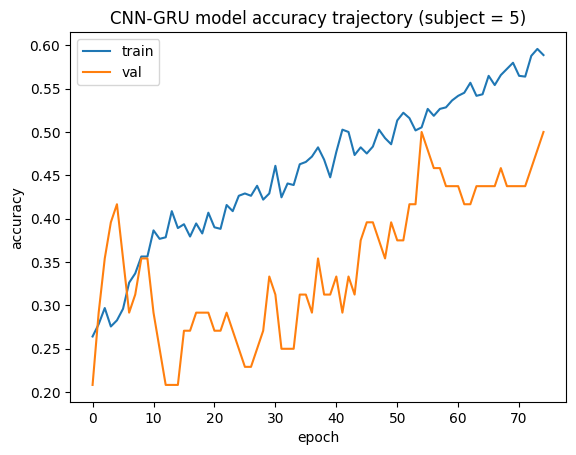

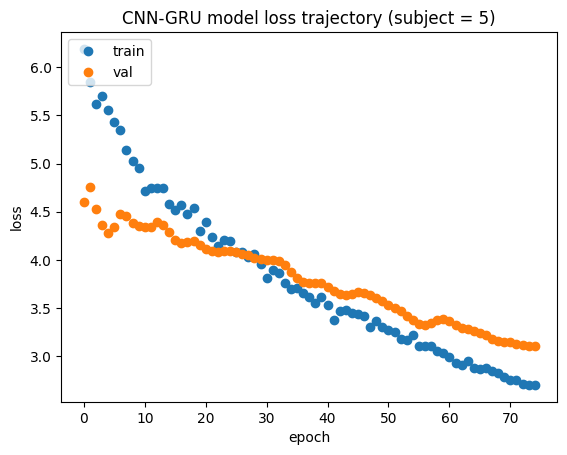

Test accuracy of the CNN-GRU model: 0.4693877696990967
(2115, 22, 1000)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_26 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_52 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_27 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_27 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 4s 194ms/step - loss: 5.9094 - accuracy: 0.2603 - val_loss: 3.8662 - val_accuracy: 0.3357
Epoch 2/75
16/16 [==============================] - 3s 176ms/step - loss: 5.1328 - accuracy: 0.2759 - val_loss: 3.7835 - val_accuracy: 0.3262
Epoch 3/75
16/16 [==============================] - 3s 171ms/step - loss: 4.6545 - accuracy: 0.2975 - val_loss: 3.7338 - val_accuracy: 0.3381
Epoch 4/75
16/16 [==============================] - 3s 169ms/step - loss: 4.3192 - accuracy: 0.3023 - val_loss: 3.3557 - val_accuracy: 0.3853
Epoch 5/75
16/16 [==============================] - 3s 186ms/step - loss: 3.9888 - accuracy: 0.3146 - val_loss: 3.2893 - val_accuracy: 0.3877
Epoch 6/75
16/16 [==============================] - 3s 173ms/step - loss: 3.7282 - accuracy: 0.3200 - val_loss: 3.1089 - val_accuracy: 0.4255
Epoch 7/75
16/16 [==============================] - 3s 177ms/step - loss: 3.5032 - accuracy: 0.3324 - val_loss: 3.0726 - val_accuracy: 0.3972
Epoch 8/75
16/16 

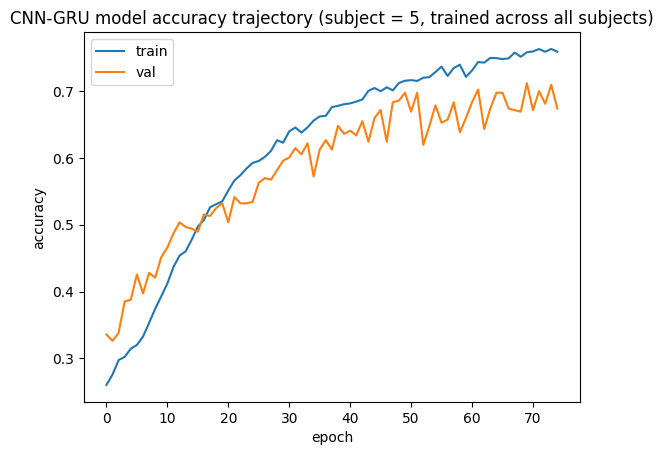

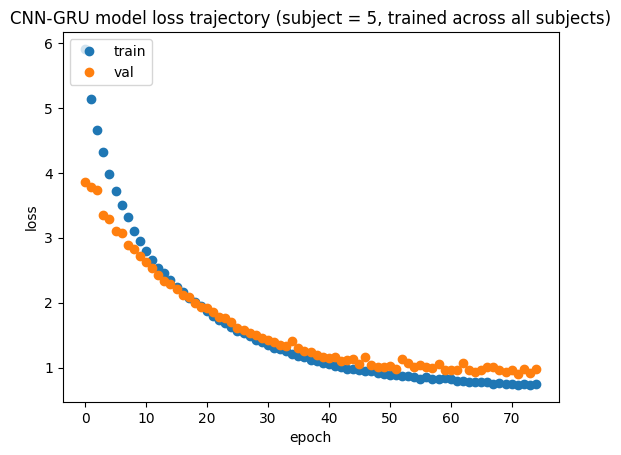

Test accuracy of the CNN-GRU model: 0.6122449040412903
(2115, 22, 1000)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_28 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_29 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_29 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_57 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 264ms/step - loss: 5.6626 - accuracy: 0.2535 - val_loss: 4.6920 - val_accuracy: 0.3333
Epoch 2/75
2/2 [==============================] - 0s 95ms/step - loss: 5.4089 - accuracy: 0.2614 - val_loss: 3.8887 - val_accuracy: 0.2917
Epoch 3/75
2/2 [==============================] - 0s 94ms/step - loss: 5.0880 - accuracy: 0.3088 - val_loss: 3.9993 - val_accuracy: 0.3542
Epoch 4/75
2/2 [==============================] - 0s 101ms/step - loss: 4.9297 - accuracy: 0.3509 - val_loss: 3.9313 - val_accuracy: 0.3125
Epoch 5/75
2/2 [==============================] - 0s 99ms/step - loss: 5.0064 - accuracy: 0.3289 - val_loss: 3.7470 - val_accuracy: 0.4167
Epoch 6/75
2/2 [==============================] - 0s 105ms/step - loss: 4.7662 - accuracy: 0.3667 - val_loss: 3.6950 - val_accuracy: 0.4167
Epoch 7/75
2/2 [==============================] - 0s 90ms/step - loss: 4.4498 - accuracy: 0.4079 - val_loss: 3.7408 - val_accuracy: 0.4375
Epoch 8/75
2/2 [===================

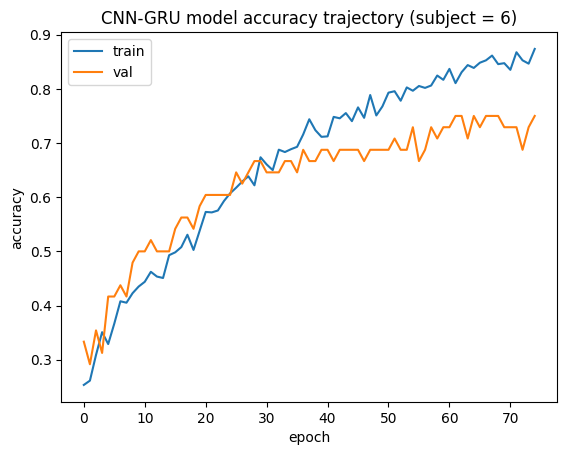

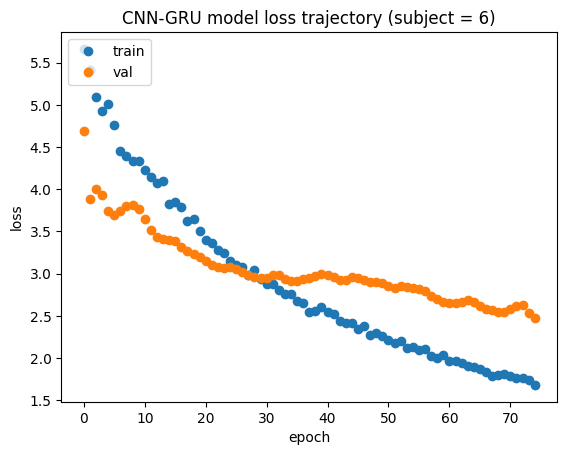

Test accuracy of the CNN-GRU model: 0.6800000071525574
(2115, 22, 1000)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_30 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_31 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_31 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_61 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 110ms/step - loss: 5.7123 - accuracy: 0.2529 - val_loss: 4.1295 - val_accuracy: 0.3026
Epoch 2/75
16/16 [==============================] - 2s 100ms/step - loss: 5.0596 - accuracy: 0.2813 - val_loss: 3.7037 - val_accuracy: 0.3522
Epoch 3/75
16/16 [==============================] - 2s 98ms/step - loss: 4.5304 - accuracy: 0.2959 - val_loss: 3.5371 - val_accuracy: 0.3712
Epoch 4/75
16/16 [==============================] - 2s 99ms/step - loss: 4.1963 - accuracy: 0.2960 - val_loss: 3.3597 - val_accuracy: 0.3783
Epoch 5/75
16/16 [==============================] - 2s 106ms/step - loss: 3.9416 - accuracy: 0.3048 - val_loss: 3.2427 - val_accuracy: 0.3404
Epoch 6/75
16/16 [==============================] - 2s 104ms/step - loss: 3.6870 - accuracy: 0.3145 - val_loss: 3.1432 - val_accuracy: 0.3546
Epoch 7/75
16/16 [==============================] - 2s 102ms/step - loss: 3.4490 - accuracy: 0.3316 - val_loss: 3.0172 - val_accuracy: 0.3972
Epoch 8/75
16/16 [=

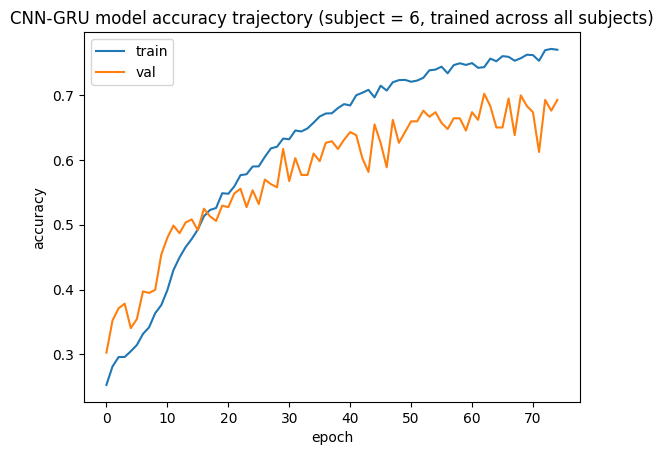

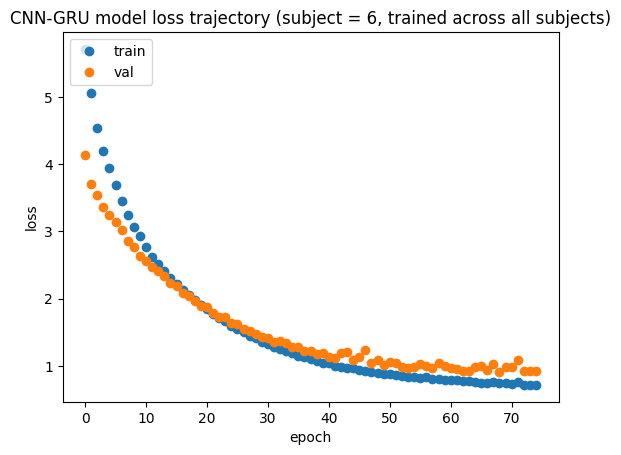

Test accuracy of the CNN-GRU model: 0.6800000071525574
(2115, 22, 1000)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_32 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_64 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_33 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_65 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 2s 330ms/step - loss: 5.8400 - accuracy: 0.2568 - val_loss: 4.2965 - val_accuracy: 0.2979
Epoch 2/75
2/2 [==============================] - 0s 93ms/step - loss: 5.7707 - accuracy: 0.2712 - val_loss: 4.1704 - val_accuracy: 0.2979
Epoch 3/75
2/2 [==============================] - 0s 91ms/step - loss: 5.6070 - accuracy: 0.2811 - val_loss: 3.9703 - val_accuracy: 0.3191
Epoch 4/75
2/2 [==============================] - 0s 97ms/step - loss: 5.5587 - accuracy: 0.2730 - val_loss: 3.9116 - val_accuracy: 0.2979
Epoch 5/75
2/2 [==============================] - 0s 102ms/step - loss: 5.4051 - accuracy: 0.2838 - val_loss: 3.8731 - val_accuracy: 0.3191
Epoch 6/75
2/2 [==============================] - 0s 88ms/step - loss: 5.3451 - accuracy: 0.2811 - val_loss: 3.8436 - val_accuracy: 0.3404
Epoch 7/75
2/2 [==============================] - 0s 93ms/step - loss: 5.1666 - accuracy: 0.3360 - val_loss: 3.7713 - val_accuracy: 0.3191
Epoch 8/75
2/2 [====================

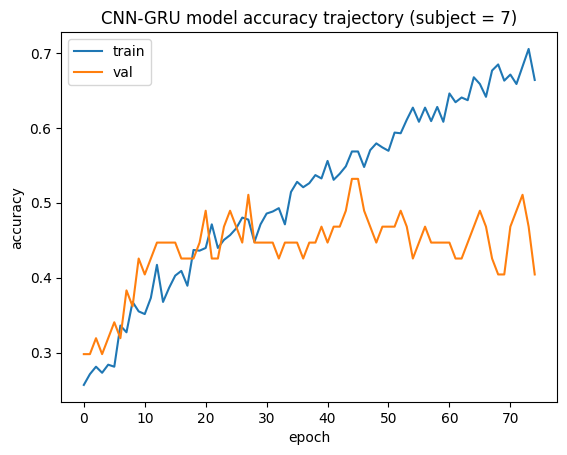

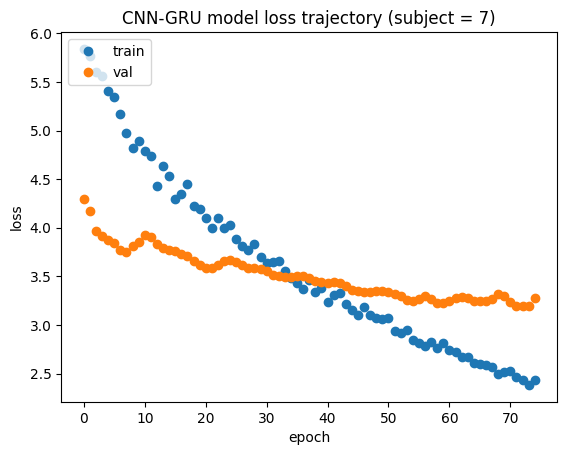

Test accuracy of the CNN-GRU model: 0.5
(2115, 22, 1000)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_68 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_35 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_35 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_69 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 123ms/step - loss: 5.4746 - accuracy: 0.2648 - val_loss: 3.9782 - val_accuracy: 0.3097
Epoch 2/75
16/16 [==============================] - 2s 106ms/step - loss: 4.8874 - accuracy: 0.2801 - val_loss: 3.7771 - val_accuracy: 0.3428
Epoch 3/75
16/16 [==============================] - 2s 104ms/step - loss: 4.4542 - accuracy: 0.2967 - val_loss: 3.5567 - val_accuracy: 0.3522
Epoch 4/75
16/16 [==============================] - 2s 101ms/step - loss: 4.1162 - accuracy: 0.2977 - val_loss: 3.3478 - val_accuracy: 0.3617
Epoch 5/75
16/16 [==============================] - 2s 100ms/step - loss: 3.7828 - accuracy: 0.3128 - val_loss: 3.2762 - val_accuracy: 0.3617
Epoch 6/75
16/16 [==============================] - 2s 102ms/step - loss: 3.5597 - accuracy: 0.3196 - val_loss: 3.1600 - val_accuracy: 0.3428
Epoch 7/75
16/16 [==============================] - 2s 102ms/step - loss: 3.3742 - accuracy: 0.3239 - val_loss: 2.9728 - val_accuracy: 0.3806
Epoch 8/75
16/16 

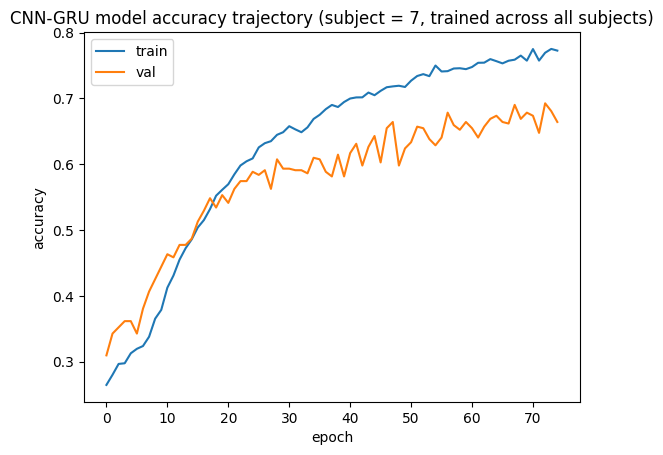

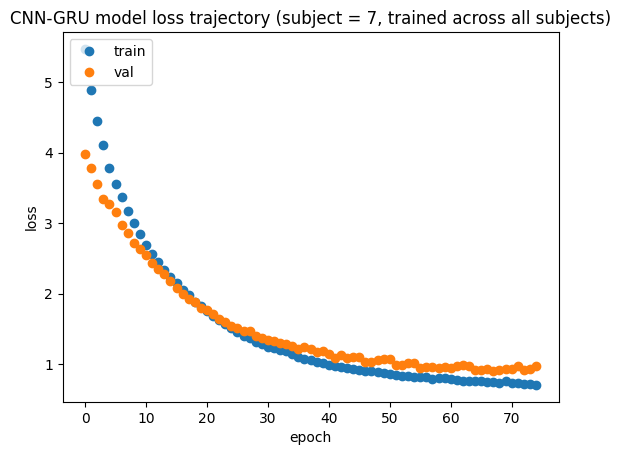

Test accuracy of the CNN-GRU model: 0.7200000286102295
(2115, 22, 1000)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_36 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_72 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_37 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_37 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_73 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 [==============================] - 1s 260ms/step - loss: 6.1797 - accuracy: 0.2373 - val_loss: 4.6488 - val_accuracy: 0.2128
Epoch 2/75
2/2 [==============================] - 0s 89ms/step - loss: 5.8039 - accuracy: 0.2572 - val_loss: 4.1683 - val_accuracy: 0.2979
Epoch 3/75
2/2 [==============================] - 0s 89ms/step - loss: 5.4646 - accuracy: 0.2998 - val_loss: 4.0483 - val_accuracy: 0.3191
Epoch 4/75
2/2 [==============================] - 0s 94ms/step - loss: 5.5341 - accuracy: 0.2754 - val_loss: 4.1190 - val_accuracy: 0.3404
Epoch 5/75
2/2 [==============================] - 0s 94ms/step - loss: 5.2570 - accuracy: 0.3188 - val_loss: 4.1676 - val_accuracy: 0.3404
Epoch 6/75
2/2 [==============================] - 0s 94ms/step - loss: 5.3597 - accuracy: 0.3179 - val_loss: 4.1208 - val_accuracy: 0.4043
Epoch 7/75
2/2 [==============================] - 0s 95ms/step - loss: 5.0892 - accuracy: 0.3614 - val_loss: 4.1052 - val_accuracy: 0.3191
Epoch 8/75
2/2 [=====================

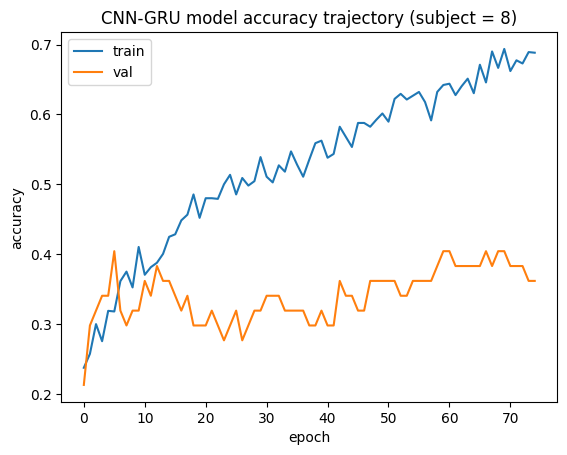

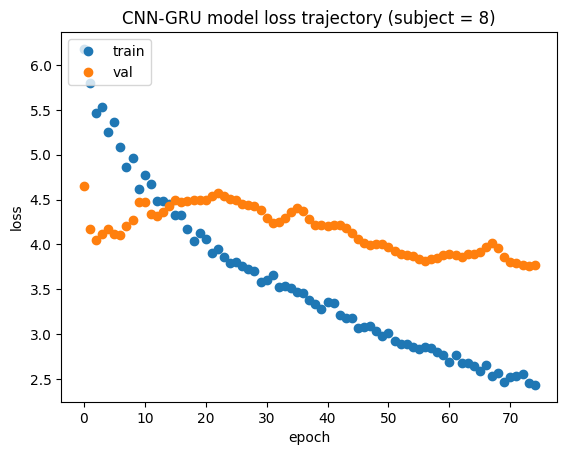

Test accuracy of the CNN-GRU model: 0.5744680762290955
(2115, 22, 1000)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 200, 22)           4862      
                                                                 
 max_pooling1d_38 (MaxPooli  (None, 100, 22)           0         
 ng1D)                                                           
                                                                 
 dropout_76 (Dropout)        (None, 100, 22)           0         
                                                                 
 conv1d_39 (Conv1D)          (None, 100, 22)           4862      
                                                                 
 max_pooling1d_39 (MaxPooli  (None, 50, 22)            0         
 ng1D)                                                           
                                                                 
 dropout_77 (Dropout)        (None, 50, 22)          

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 3s 110ms/step - loss: 5.7659 - accuracy: 0.2696 - val_loss: 3.9605 - val_accuracy: 0.3381
Epoch 2/75
16/16 [==============================] - 2s 95ms/step - loss: 4.9831 - accuracy: 0.2937 - val_loss: 3.7029 - val_accuracy: 0.3452
Epoch 3/75
16/16 [==============================] - 2s 96ms/step - loss: 4.5477 - accuracy: 0.3064 - val_loss: 3.5180 - val_accuracy: 0.3759
Epoch 4/75
16/16 [==============================] - 2s 98ms/step - loss: 4.2122 - accuracy: 0.3014 - val_loss: 3.3877 - val_accuracy: 0.3948
Epoch 5/75
16/16 [==============================] - 2s 98ms/step - loss: 3.9089 - accuracy: 0.3120 - val_loss: 3.2216 - val_accuracy: 0.4137
Epoch 6/75
16/16 [==============================] - 2s 104ms/step - loss: 3.6772 - accuracy: 0.3062 - val_loss: 3.0686 - val_accuracy: 0.4232
Epoch 7/75
16/16 [==============================] - 2s 98ms/step - loss: 3.4260 - accuracy: 0.3276 - val_loss: 2.9187 - val_accuracy: 0.4421
Epoch 8/75
16/16 [====

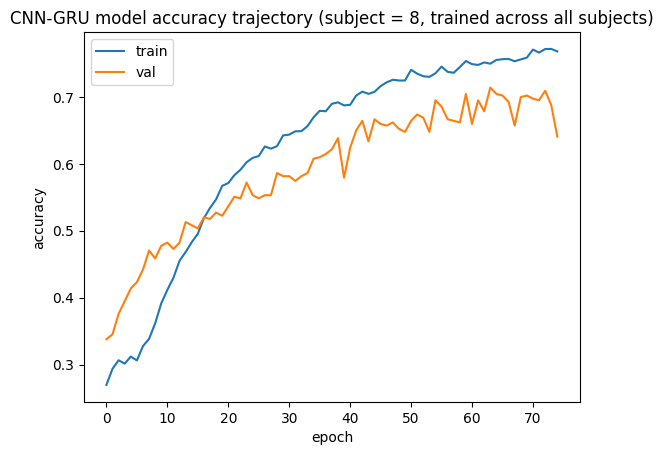

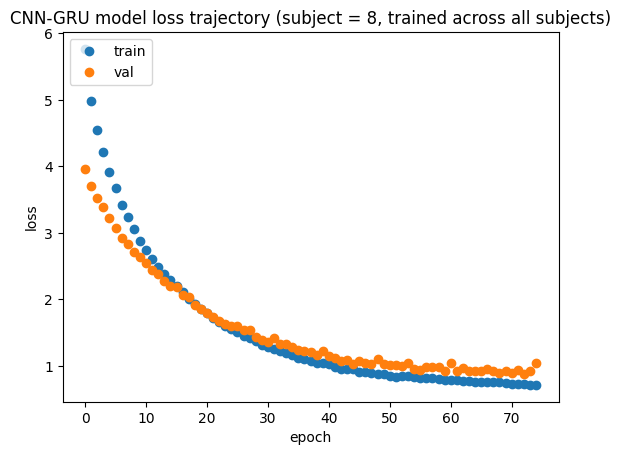

Test accuracy of the CNN-GRU model: 0.7659574747085571


In [6]:
#0 to 8 inclusive
for i in np.arange(0, 9):
    # Load original data
    X_test = np.load("../ECEC147project-data/X_test.npy")
    y_test = np.load("../ECEC147project-data//y_test.npy")
    person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
    X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
    print(X_train_valid.shape)
    y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
    person_test = np.load("../ECEC147project-data/person_test.npy")



    # Slice data by subject
    subject_train_valid_ind = np.where(person_train_valid == i)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == i)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]

    data = dict()
    data['X_train_valid'] = subject_X_train_valid
    data['y_train_valid'] = subject_y_train_valid
    data['X_test'] = subject_X_test
    data['y_test'] = subject_y_test
    data['person_train_valid'] = person_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    CNN_GRU = Sequential()

    CNN_GRU.add(Conv1D(22, 10, input_shape=(X_train.shape[1], X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN_GRU.add(MaxPooling1D(2))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Conv1D(22, 10, input_shape=(X_train.shape[1]/2, X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN_GRU.add(MaxPooling1D(2))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(GRU(44, kernel_regularizer=l2(0.03), return_sequences=True))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Flatten())
    CNN_GRU.add(Dense(64))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    CNN_GRU.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    CNN_GRU.summary()


    CNN_GRU_results = CNN_GRU.fit(X_train, y_train, epochs=75, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(CNN_GRU_results.history['accuracy'])
    plt.plot(CNN_GRU_results.history['val_accuracy'])
    plt.title('CNN-GRU model accuracy trajectory (subject = {})'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(CNN_GRU_results.history['loss'],'o')
    plt.plot(CNN_GRU_results.history['val_loss'],'o')
    plt.title('CNN-GRU model loss trajectory (subject = {})'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    CNN_GRU_score = CNN_GRU.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the CNN-GRU model:',CNN_GRU_score[1])







    ## Now train across all subjects

    # Load original data
    X_test = np.load("../ECEC147project-data/X_test.npy")
    y_test = np.load("../ECEC147project-data//y_test.npy")
    person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
    X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
    print(X_train_valid.shape)
    y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
    person_test = np.load("../ECEC147project-data/person_test.npy")


    # Slice data by subject
    subject_test_ind = np.where(person_test == i)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]

    data = dict()
    data['X_test'] = subject_X_test
    data['y_test'] = subject_y_test
    data['person_train_valid'] = person_train_valid
    data['X_train_valid'] = X_train_valid
    data['y_train_valid'] = y_train_valid
    data['person_test'] = person_test
    preprocessed_data = preprocess_data(data)

    # Load preprocessed data
    X_train = preprocessed_data['total_X_train']
    y_train = preprocessed_data['total_y_train']
    X_val = preprocessed_data['total_X_val']
    y_val = preprocessed_data['total_y_val']
    X_test = preprocessed_data['total_X_test']
    y_test = preprocessed_data['total_y_test']
    X_train = np.transpose(X_train, (0, 2, 1))
    X_val = np.transpose(X_val, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))


    # Model Architecture
    CNN_GRU = Sequential()

    CNN_GRU.add(Conv1D(22, 10, input_shape=(X_train.shape[1], X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN_GRU.add(MaxPooling1D(2))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Conv1D(22, 10, input_shape=(X_train.shape[1]/2, X_train.shape[2]),padding='same', kernel_regularizer=l2(0.03)))
    CNN_GRU.add(MaxPooling1D(2))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(GRU(44, kernel_regularizer=l2(0.03), return_sequences=True))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Flatten())
    CNN_GRU.add(Dense(64))
    CNN_GRU.add(Dropout(0.5))
    CNN_GRU.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

    CNN_GRU.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    CNN_GRU.summary()


    CNN_GRU_results = CNN_GRU.fit(X_train, y_train, epochs=75, batch_size=640, validation_data=(X_val, y_val), shuffle=True, verbose=1, callbacks=[])

    # Plotting accuracy trajectory
    plt.plot(CNN_GRU_results.history['accuracy'])
    plt.plot(CNN_GRU_results.history['val_accuracy'])
    plt.title('CNN-GRU model accuracy trajectory (subject = {}, trained across all subjects)'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot(CNN_GRU_results.history['loss'],'o')
    plt.plot(CNN_GRU_results.history['val_loss'],'o')
    plt.title('CNN-GRU model loss trajectory (subject = {}, trained across all subjects)'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    ## Testing the model
    CNN_GRU_score = CNN_GRU.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy of the CNN-GRU model:',CNN_GRU_score[1])